In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder
import keras

# Merging all csv files

In [34]:
df = pd.concat(map(pd.read_csv, ['Cancer.csv', 'Nodule.csv', 'Paralysis.csv', 'Polyp.csv']), ignore_index=True)

In [35]:
df.head()

,Unnamed: 0,Jitter,CloseQuotient,SpeedQuotient,Phase,vowels,Target
0,0,0.037614,0.937500,0.483871,16,a,Cancer
1,1,0.036742,0.963636,0.913793,275,a,Cancer
2,2,0.037614,0.975379,0.948435,528,a,Cancer
3,3,0.038776,0.996188,0.977556,787,a,Cancer
4,4,0.039211,0.996205,0.982226,1054,a,Cancer


In [36]:
df=df.iloc[:,1:]

In [37]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

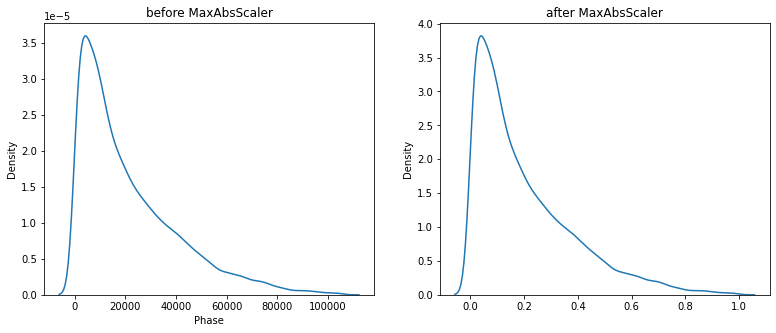

In [8]:
plots(df, 'Phase', MaxAbsScaler())

# Scaling the data

In [38]:
MBS = MinMaxScaler()

In [39]:
MBS.fit(df[['Phase']])

MinMaxScaler()

In [40]:
df[['Phase']].mean()

Phase    21499.519956
dtype: float64

In [41]:
df[['Phase']] = MBS.transform(df[['Phase']])

In [42]:
df[['Phase']].mean()

Phase    0.202603
dtype: float64

In [43]:
df[['Jitter']] = MBS.fit_transform(df[['Jitter']])

In [44]:
df[['CloseQuotient']] = MBS.fit_transform(df[['CloseQuotient']])
df[['SpeedQuotient']] = MBS.fit_transform(df[['SpeedQuotient']])

In [45]:
s = pd.get_dummies(df[['vowels']])

In [46]:
df = pd.concat([df.drop(['vowels'], axis = 1), s], axis = 1)

In [47]:
d = df[['Target']]

In [48]:
df = df.drop(['Target'], axis = 1)
df['Target'] = d

In [49]:
le = LabelEncoder()

In [50]:
df['Target'] = le.fit_transform(df['Target'])

In [51]:
df.head(2) # 0 -> cancer, 1 -> Nodule, 2 -> Paralysis, 3 -> Polyp

,Jitter,CloseQuotient,SpeedQuotient,Phase,vowels_a,vowels_e,vowels_o,Target
0,0.012283,0.000072,0.002107,0.000094,1,0,0,0
1,0.011998,0.000074,0.004017,0.002536,1,0,0,0


In [52]:
dataset = df.values

In [53]:
len(dataset)

78145

In [54]:
dataset

array([[1.22831612e-02, 7.17002630e-05, 2.10662594e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19977075e-02, 7.37353590e-05, 4.01747507e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22831612e-02, 7.46496774e-05, 4.17144415e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.70751892e-03, 8.91934787e-05, 4.28079747e-03, ...,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [3.80996078e-03, 8.86675075e-05, 4.28654025e-03, ...,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [3.85386439e-03, 1.59880161e-02, 4.29677837e-03, ...,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+00]])

In [55]:
X = dataset[:,0:7]
Y = dataset[:,7]

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Building and Training Machine Learning Model

# SVM

In [147]:
from sklearn.svm import SVC

In [153]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(kernel='sigmoid', random_state=1)

In [154]:
Y_pred = classifier.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8303830404367856


# KNN

In [163]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier(n_neighbors=5,)

In [190]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [191]:
print(knn.predict(X_test))

[0. 3. 1. ... 3. 1. 0.]


In [192]:
print(knn.score(X_test, Y_test))

0.714639140078485
